In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist_data = fetch_openml('mnist_784', version=1)

In [5]:
X, y = mnist_data['data'], mnist_data['target']
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)

Shape of X: (70000, 784) 
 Shape of y: (70000,)


In [12]:
X, y = X[:20000], y[:20000].astype('int')


In [5]:
np.bincount(y)

array([1994, 2281, 1929, 2076, 1945, 1775, 1971, 2093, 1922, 2014])

(-0.5, 27.5, 27.5, -0.5)

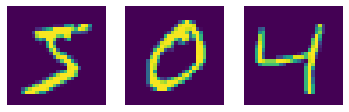

In [6]:
digit = X[0]
digit_pixels = digit.reshape(28, 28)
plt.subplot(131)
plt.imshow(digit_pixels)
plt.axis('off')

digit = X[1]
digit_pixels = digit.reshape(28, 28)
plt.subplot(132)
plt.imshow(digit_pixels)
plt.axis('off')

digit = X[2]
digit_pixels = digit.reshape(28, 28)
plt.subplot(133)
plt.imshow(digit_pixels)
plt.axis('off')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
C = 0.1
clf = svm.SVC(kernel='poly', gamma=0.7, C=C)
clf.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9636
Accuracy SD: 		 0.004458


In [36]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10, n_jobs=-1)

In [37]:
confusion_matrix(y_train, y_train_pred)

array([[1409,    0,    4,    0,    2,    1,    3,    1,    2,    2],
       [   0, 1542,    8,    2,    2,    1,    0,    1,    5,    1],
       [   5,    6, 1284,   12,    7,    0,    5,    8,   19,    3],
       [   1,    2,   17, 1364,    1,   18,    3,   13,   19,   10],
       [   1,    2,    9,    0, 1297,    2,    7,    2,    2,   21],
       [   3,    1,    2,   17,    7, 1213,   10,    0,    9,    5],
       [   6,    4,    5,    0,    5,    5, 1368,    1,    8,    1],
       [   3,    2,    5,    5,   16,    0,    0, 1383,    4,   24],
       [   2,    5,   12,    7,    6,   11,    5,    2, 1313,   10],
       [   3,    3,    8,    8,   21,    4,    0,   16,    9, 1317]])

In [38]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1424
           1       0.98      0.99      0.99      1562
           2       0.95      0.95      0.95      1349
           3       0.96      0.94      0.95      1448
           4       0.95      0.97      0.96      1343
           5       0.97      0.96      0.96      1267
           6       0.98      0.98      0.98      1403
           7       0.97      0.96      0.96      1442
           8       0.94      0.96      0.95      1373
           9       0.94      0.95      0.95      1389

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [40]:
y_test_pred = clf.predict(X_test)

In [41]:
confusion_matrix(y_test, y_test_pred)

array([[560,   1,   2,   1,   3,   0,   1,   0,   2,   0],
       [  0, 711,   1,   2,   3,   0,   0,   0,   0,   2],
       [  2,   1, 554,   3,   5,   1,   1,   4,   8,   1],
       [  0,   0,   0, 610,   0,   4,   0,   2,  10,   2],
       [  0,   0,   0,   0, 591,   1,   0,   0,   2,   8],
       [  0,   0,   2,  12,   1, 483,   4,   0,   5,   1],
       [  4,   0,   4,   0,   3,   4, 552,   0,   1,   0],
       [  1,   2,   4,   0,   6,   0,   0, 624,   1,  13],
       [  2,   2,   4,   5,   1,   7,   1,   1, 524,   2],
       [  4,   1,   1,   6,  11,   1,   0,   5,   4, 592]])

In [42]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       570
           1       0.99      0.99      0.99       719
           2       0.97      0.96      0.96       580
           3       0.95      0.97      0.96       628
           4       0.95      0.98      0.96       602
           5       0.96      0.95      0.96       508
           6       0.99      0.97      0.98       568
           7       0.98      0.96      0.97       651
           8       0.94      0.95      0.95       549
           9       0.95      0.95      0.95       625

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
res = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

array([0.89608541, 0.91103203, 0.90734141, 0.90214286, 0.91279485,
       0.88849178, 0.90707648, 0.8962804 , 0.89978525, 0.90179211])

In [26]:
y_pred = sgd_clf.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[540,   0,   4,   1,   1,   9,   4,   0,  11,   0],
       [  0, 689,   2,   3,   2,   6,   2,   1,  12,   2],
       [  3,   2, 512,  11,   7,   5,  11,   0,  29,   0],
       [  2,   3,  14, 546,   0,  22,   1,   4,  29,   7],
       [  3,   0,   5,   2, 536,   0,   5,   2,  28,  21],
       [  4,   0,   3,  27,   6, 416,   7,   0,  38,   7],
       [  4,   0,   4,   0,   4,   5, 542,   0,   9,   0],
       [  3,   0,   8,   2,   5,   0,   1, 595,   9,  28],
       [  2,   9,   6,  10,   0,  10,   5,   0, 497,  10],
       [  8,   3,   2,  16,  15,   1,   0,  18,  26, 536]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       570
           1       0.98      0.96      0.97       719
           2       0.91      0.88      0.90       580
           3       0.88      0.87      0.88       628
           4       0.93      0.89      0.91       602
           5       0.88      0.82      0.85       508
           6       0.94      0.95      0.95       568
           7       0.96      0.91      0.94       651
           8       0.72      0.91      0.80       549
           9       0.88      0.86      0.87       625

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.91      0.90      0.90      6000

